In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
import matplotlib.pyplot as plt

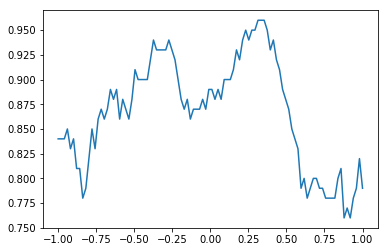

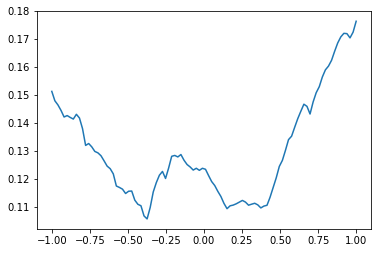

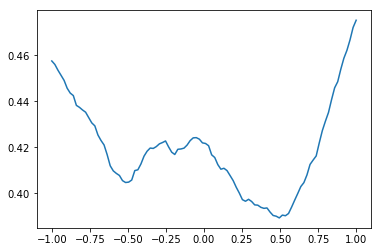

In [33]:
from econml.sklearn_extensions.honestforest import SubsampledHonestForest
n = 1000
d = 10
x_grid = np.linspace(-1, 1, 100)
X_test = np.hstack([x_grid.reshape(-1, 1), np.zeros((100, d-1))])
coverage = []
exp_dict = {'point': [], 'low': [], 'up': []}
for _ in range(100):
    X = np.random.normal(0, 1, size=(n, d))
    y = X[:, 0] + np.random.normal(size=(n,))
    est = SubsampledHonestForest(n_estimators=10000, global_averaging=True, verbose=0)
    est.fit(X, y)
    point = est.predict(X_test)
    low, up = est.predict_interval(X_test, 5, 95, normal=True)
    coverage.append((low <= x_grid) & (x_grid <= up))
    exp_dict['point'].append(point)
    exp_dict['low'].append(low)
    exp_dict['up'].append(up)

plt.plot(x_grid, np.mean(coverage, axis=0))
plt.show()

plt.plot(x_grid, np.sqrt(np.mean((np.array(exp_dict['point']) - x_grid)**2, axis=0)), label='RMSE')
plt.show()

plt.plot(x_grid, np.mean(np.array(exp_dict['up']) - np.array(exp_dict['low']), axis=0), label='length')
plt.show()

In [ ]:
from econml.sklearn_extensions.honestforest import SubsampledHonestForest
n = 1000
d = 10
x_grid = np.linspace(-1, 1, 100)
X_test = np.hstack([x_grid.reshape(-1, 1), np.zeros((100, d-1))])
coverage = []
exp_dict = {'point': [], 'low': [], 'up': []}
for _ in range(100):
    X = np.random.normal(0, 1, size=(n, d))
    y = X[:, 0] + np.random.normal(size=(n,))
    est = SubsampledHonestForest(n_estimators=10000, global_averaging=True, verbose=0)
    est.fit(X, y)
    point = est.predict(X_test)
    low, up = est.predict_interval(X_test, 5, 95, normal=False)
    coverage.append((low <= x_grid) & (x_grid <= up))
    exp_dict['point'].append(point)
    exp_dict['low'].append(low)
    exp_dict['up'].append(up)

plt.plot(x_grid, np.mean(coverage, axis=0))
plt.show()

plt.plot(x_grid, np.sqrt(np.mean((np.array(exp_dict['point']) - x_grid)**2, axis=0)), label='RMSE')
plt.show()

plt.plot(x_grid, np.mean(np.array(exp_dict['up']) - np.array(exp_dict['low']), axis=0), label='length')
plt.show()

In [24]:
from econml.sklearn_extensions.honestforest import SubsampledHonestForest
n = 1000
d = 10
X = np.random.normal(0, 1, size=(n, d))
y = X[:, 0] + np.random.normal(size=(n,))
est = SubsampledHonestForest(n_estimators=10000, global_averaging=True, verbose=2)
est.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 10000
building tree 2 of 10000
building tree 3 of 10000
building tree 4 of 10000
building tree 5 of 10000
building tree 6 of 10000
building tree 7 of 10000
building tree 8 of 10000
building tree 9 of 10000
building tree 10 of 10000
building tree 11 of 10000
building tree 12 of 10000
building tree 13 of 10000
building tree 14 of 10000
building tree 15 of 10000
building tree 16 of 10000
building tree 17 of 10000
building tree 18 of 10000
building tree 19 of 10000
building tree 20 of 10000
building tree 21 of 10000
building tree 22 of 10000
building tree 23 of 10000
building tree 24 of 10000
building tree 25 of 10000
building tree 26 of 10000
building tree 27 of 10000
building tree 28 of 10000
building tree 29 of 10000
building tree 30 of 10000
building tree 31 of 10000
building tree 32 of 10000
building tree 33 of 10000
building tree 34 of 10000
building tree 35 of 10000
building tree 36 of 10000
building tree 37 of 10000
building tree 38 of 10000
building tree 39 of 1

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:  4.2min finished


SubsampledHonestForest(criterion='mse', global_averaging=True, honest=True,
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=None, random_state=None,
            subsample_fr=0.7539100717736421, verbose=2, warm_start=False)

In [31]:
point = est.predict(np.hstack([np.linspace(-1, 1, 100).reshape(-1, 1), np.zeros((100, d-1))]))
low, up = est.predict_interval(np.hstack([np.linspace(-1, 1, 100).reshape(-1, 1), np.zeros((100, d-1))]),
                               1, 99, normal=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    0.7s finished


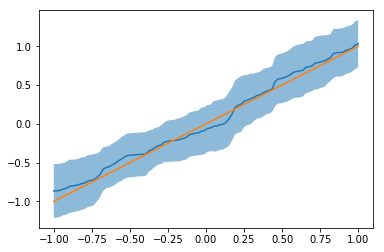

In [32]:
plt.fill_between(np.linspace(-1, 1, 100), low, up, alpha=.5)
plt.plot(np.linspace(-1, 1, 100), point)
plt.plot(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
plt.show()